# Part 1
Arctic watersheds are largely influenced by the state of permafrost within the region. Climate change is resulting in surface air temperature increases in arctic regions, which will degrade permafrost. This degradation takes place through wholesale decreases in permafrost extent, increases in active layer thaw depths, and thermokarst development. These changes can affect biogeochemistry by altering flow paths, water residence time, ecosystem dynamics, and more.

In response to climate change, DOC export is predicted to show both increases and decreases. As permafrost thaw takes place, waterflow pathways are altered to take place at greater depth. Higher permafrost acts as a physical barrier that isolates flow to organic-rich, near surface soils. The interaction of water with this organic-rich soil promotes relatively high rates of DOC export. When permafrost thaws, flow is no longer restricted to the near surface and is redistributed to soils at greater depth. In some cases, such as peatlands, these deeper soils may be abundant in organic matter and DOC export will therefore increase. However, other regions may have decreasing organic soils with depth, which will result in a decrease in DOC export. An increase in active layer depth may result in an increase in DOC age. If the thawed substrate is rich in OC, exported DOC will generally be older. If the substrate is not rich in OC, then DOC will be sourced from surface layers regardless and the age of exported DOC will show no change. In this way, an increase in exported DOC’s age indicates permafrost thawing, but no change in exported DOC’s age can not be used as a proxy for thawing. DON exports are predicted to be more uniform across watersheds, and are expected to increase as thawing occurs. This is likely because DON is restricted to organic processes near the surface.
    
Changes in inorganic N concentrations have proven difficult to predict. One theory is that decreased permafrost allows for longer soil residence time and therefore increased DIN removal. This is observed in West Siberian peatlands, where remineralization of organic N is limited by saturated soils, and denitrification is increased. Another theory indicates that deeper flow paths will increase nitrate export. This is observed in Alaska, where remineralization of organic N and subsequent nitrification is likely occurring within thawed soils. P exports are predicted to increase. This is because mineral weathering is the primary source of P, and deeper flow paths would be expected to have higher concentrations of P rich minerals. This is also the case of major ion concentrations. Similarly to P, many major ions are sourced from inorganic sediment, and increasing the depth of flow paths will enable these ions to be dissolved and delivered to streams.
    
Challenges mentioned by the authors include the absence of long-term datasets and seasonally varied datasets. The authors mention that space-for-time substitutions  may capture variable behavior between watersheds, but may miss key transitional dynamics within isolated watersheds. It is suggested that year-round sampling of major arctic rivers is continued, along with the establishment of year-round sampling programs of smaller streams within the arctic.
    
Ultimately, this paper indicates the intricate relationship between the lithosphere, atmosphere, cryosphere, and hydrosphere. Alterations in one can have cascading effects on all spheres, which ultimately alter biogeochemical cycling. This is clearly displayed in the paper, where increasing atmospheric temperatures alter permafrost extent, which allows hydrologic flow paths to extend to deeper soil horizons. Another major take home that I got from this paper is that biogeochemical processes can be highly variable and region dependent. This was demonstrated by the difficulty in predicting alterations in carbon and nitrogen exports.


# Part 2
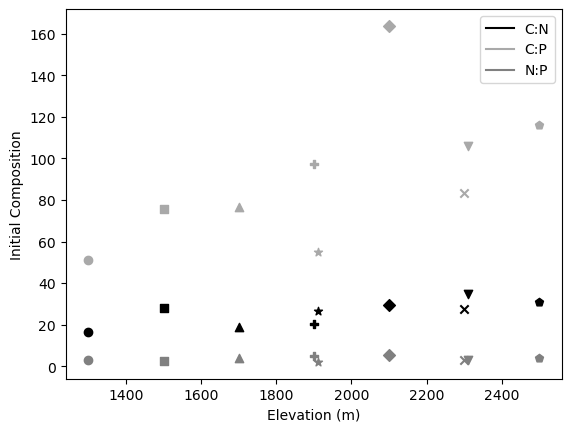

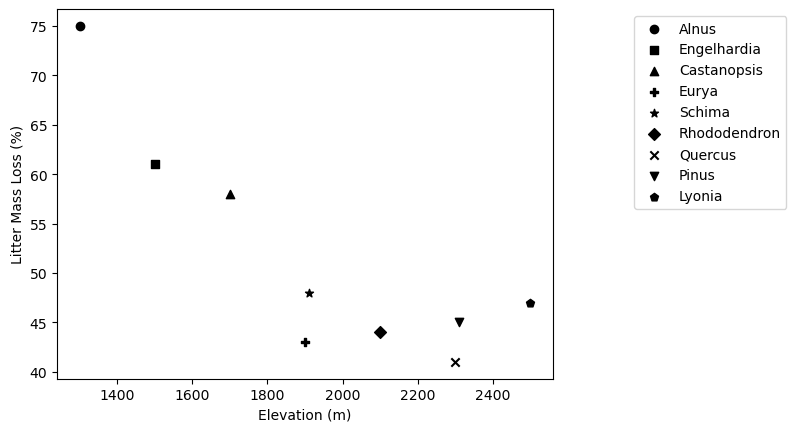

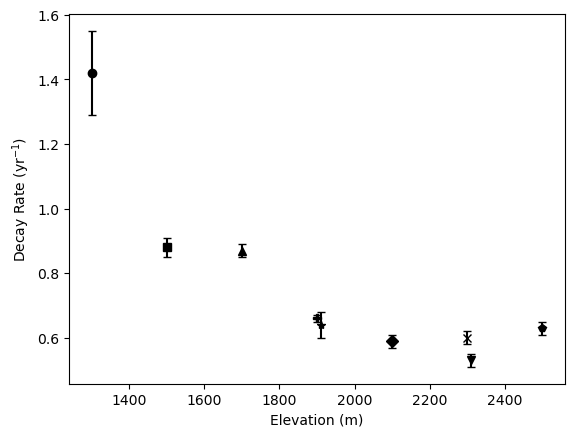

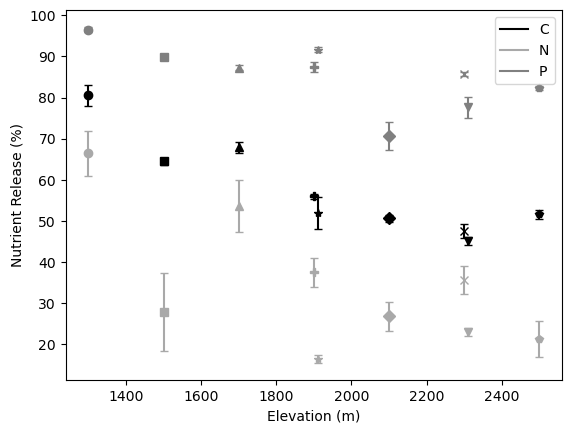

**Fig. 1** Initial composition stoichiometry, litter mass loss, decay rate, and final chemistry versus elevation. Tree species is indicated by symbol. Species at the same elevation are staggered to increase readability.

Initial C compositions are higher than both N and P across all species and at all elevations. C:P ratios are the greatest and N:P ratios are the lowest. C:P ratios show a noticeable increase with elevation, C:N shows a slight increase, and N:P shows little change. Litter mass loss shows a general decrease with elevation. Lyonia, the highest elevation species, shows an anomalously high litter mass loss.  Decay rate shows a similar trend to litter mass loss. Decay rate generally decreases with increased elevation, but stagnates and increases slightly at the highest elevations. Nutrient release for C, N, and P all show decreases with increasing elevation. Generally, P nutrient release is the greatest, followed by C and then N.

These results indicate that species at higher elevations tend to have higher nutrient levels within their leaf mass. The leaf mass also loses less mass and decays at a lower rate at high elevations. This decreased mass loss and decay rate correlates with a decrease in the amount of nutrients released. High elevation species likely exhibit this trait as a means of nutrient retention in an environment that is low in soil derived nutrients. A decreased decay rate indicates that the leaves are less likely to abscise, and the plants can retain the nutrients in their biomass. Additionally, the delayed decay allows the slow release of nutrients back into the soil, which enables the trees to reclaim the lost nutrients over a prolonged period.

# Part 3

$Flux$ $CO_2 = K_{CO_2}(CO_{2 atm}-CO_{2 stream}) = 2.3m/d(1.3*10^{-8}M-5*10^{-5}M)=-1.15*10^{-4}M*m/d$

$Released$ $C_{stream}=-1.15*10^{-4}M*m/d * 100m*0.5m*1000L/m^3=-5.75mol/d$

$Released$ $C_{mass}=-5.75mol/d * 12.011g/mol= -69.1 g/d = -25.2 kg/yr$


The stream is net heterotrophic, meaning it is exporting carbon to the atmosphere.

For a stream with a discharge of 0.05 m$^{3}$s$^{-1}$, CO2 fluxes are generally higher than streams of lower discharge while fluxes are lower than streams of higher discharge. This may be due to varying opportunity for metabolic activity. Smaller streams may not have enough flow to deliver critical nutrients to support a large number of organisms, while larger streams would.

The majority of carbon is leaving the stream through efflux, or discharge of stream waters. A stream of this size has a limited surface area due to its narrow width. This would mean that atmospheric exchange would be limited and CO2 would not as readily exit solution.

# Code for Generating Figures

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
#Import data
df = pd.read_csv('Bohara_etal_data-1.csv')
df

,Tree species,elevation,C,C std. err,N,N std. Err,P,P std. Err,Litter Mass Loss,K,K std. Err,C Release,C rel std. err,N Release,N rel std. err,P Release,P rel std. err
0,Alnus nepalensis D. Don,1300,37.93,0.39,2.32,0.10,0.74,0.03,75,1.42,0.13,80.54,2.59,66.46,5.52,96.51,0.66
1,Engelhardia spicata Lesch. Ex Blume.,1500,37.83,0.42,1.35,0.14,0.50,0.03,61,0.88,0.03,64.54,0.82,27.92,9.44,89.77,0.31
2,Castanopsis tribuloides (Sm.) A. DC.,1700,37.44,0.36,1.98,0.19,0.49,0.02,58,0.87,0.02,67.96,1.33,53.70,6.27,87.30,0.57
3,Eurya acuminata DC.,1900,37.89,0.06,1.86,0.08,0.39,0.03,43,0.66,0.01,56.05,0.58,37.53,3.48,87.40,1.24
4,Schima wallichii,1900,36.33,0.60,1.36,0.06,0.66,0.03,48,0.64,0.04,52.03,3.89,16.43,0.91,91.65,0.61
5,Rhododendron arboreum Sm.,2100,37.66,0.35,1.27,0.07,0.23,0.03,44,0.59,0.02,50.62,0.87,26.84,3.53,70.67,3.38
6,Quercus semecarpifolia Sm.,2300,36.70,0.07,1.33,0.08,0.44,0.01,41,0.60,0.02,47.65,1.73,35.59,3.43,85.78,0.46
7,Pinus roxburghii Sarg.,2300,37.16,0.19,1.07,0.02,0.35,0.05,45,0.53,0.02,45.23,0.96,23.00,1.01,77.69,2.54
8,Lyonia ovalifolia (Wall.) Drude,2500,37.11,0.55,1.20,0.01,0.32,0.01,47,0.63,0.02,51.65,1.09,21.39,4.31,82.29,0.42


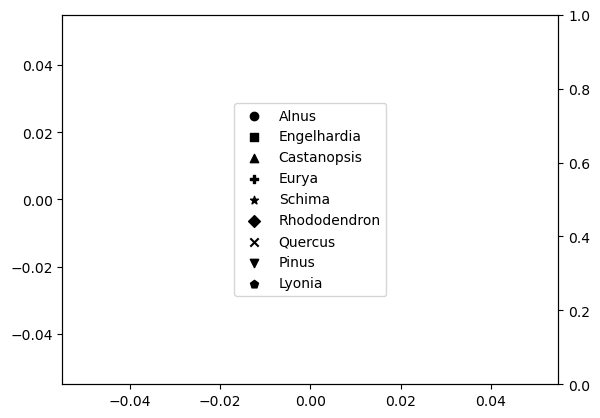

In [40]:
markers = ('o','s','^','P','*','D','x','v','p')

fig,ax = plt.subplots()
ax2=ax.twinx()
leg_el = []
leg_name=[]

for index, row in df.iterrows():

    leg_el.append(ax.scatter([],[],color='black', marker=markers[index]))
    leg_name.append(row['Tree species'].split()[0])

#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')

ax.legend(leg_el, leg_name, loc='center')

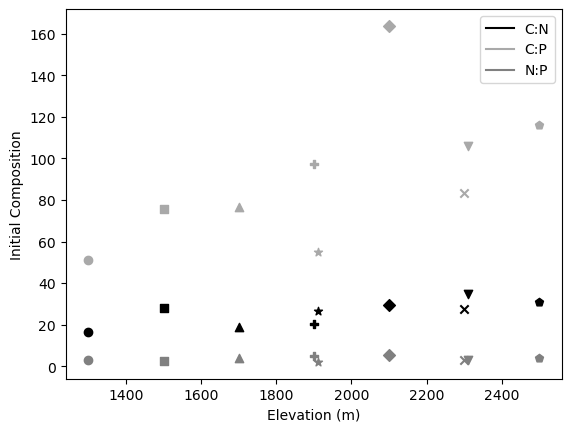

In [57]:
markers = ('o','s','^','P','*','D','x','v','p')

fig,ax = plt.subplots()
leg_el = []
leg_name=[]

df['C:N'] = df['C']/df['N']
df['C:P'] = df['C']/df['P']
df['N:P'] = df['N']/df['P']

elev_prev = -1
for index, row in df.iterrows():
    if elev_prev == row['elevation']:
        row['elevation'] += 10
    el = ax.scatter(row['elevation'], row['C:N'], color='black', marker=markers[index])
    ax.scatter(row['elevation'], row['C:P'], color='darkgray', marker=markers[index])
    ax.scatter(row['elevation'], row['N:P'], color='gray', marker=markers[index])
    elev_prev = row['elevation']
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Initial Composition')
#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')
leg_el.append(Line2D([0],[0],color='black'))
leg_el.append(Line2D([0],[0],color='darkgray'))
leg_el.append(Line2D([0],[0],color='gray'))
leg_name.append('C:N')
leg_name.append('C:P')
leg_name.append('N:P')
ax.legend(leg_el, leg_name)

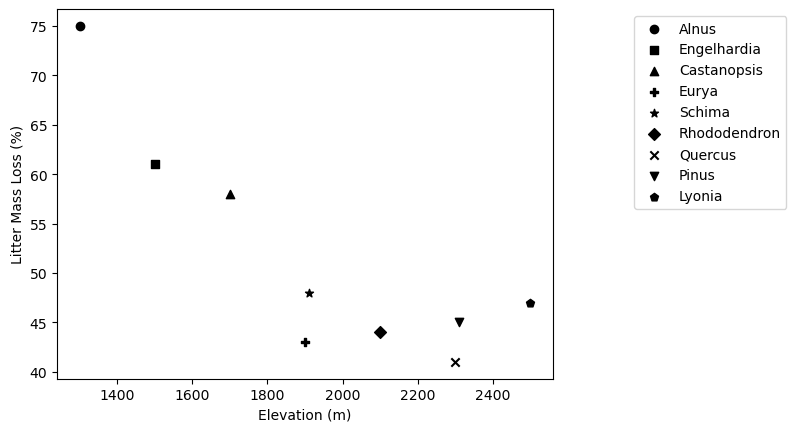

In [48]:

fix,ax = plt.subplots()
leg_el = []
leg_name=[]


elev_prev=-1
for index, row in df.iterrows():
    if elev_prev == row['elevation']:
        row['elevation'] += 10
    ax.scatter(row['elevation'], row['Litter Mass Loss'], color='black', marker=markers[index])
    leg_el.append(ax.scatter([],[],color='black', marker=markers[index]))
    leg_name.append(row['Tree species'].split()[0])
    elev_prev = row['elevation']
    
    
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Litter Mass Loss (%)')

ax.legend(leg_el, leg_name,bbox_to_anchor=(1.15, 1.0), loc='upper left')


Text(0, 0.5, 'Decay Rate (yr$^{-1}$)')

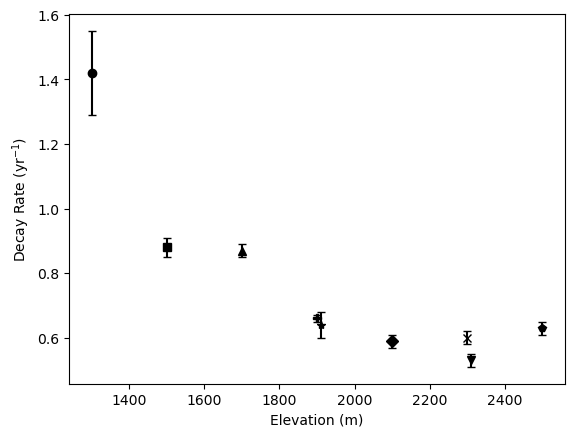

In [60]:

fix,ax = plt.subplots()
leg_el = []
leg_name=[]

elev_prev = -1
for index, row in df.iterrows():
    if elev_prev == row['elevation']:
        row['elevation'] += 10
    ax.errorbar(row['elevation'], row['K'], yerr=row['K std. Err'], capsize=3, color='black', marker=markers[index], ls='none')
    leg_el.append(ax.scatter([],[],color='black', marker=markers[index]))
    leg_name.append(row['Tree species'].split()[0])
    elev_prev = row['elevation']


ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Decay Rate (yr$^{-1}$)')

#    ax.errorbar(row['elevation'], row['N'],yerr=row['N std. Err'],capsize=3, color='darkgray', marker=markers[index])
#    ax.errorbar(row['elevation'], row['P'],yerr=row['P std. Err'],capsize=3, color='gray', marker=markers[index])

#ax.scatter(df['elevation'], df['N'], color='gray', marker = 'o')
#ax.scatter(df['elevation'], df['P'], color='lightgray', marker = 'o')
#ax2.scatter(df['elevation'], df['C'], color='black', marker = 'o')



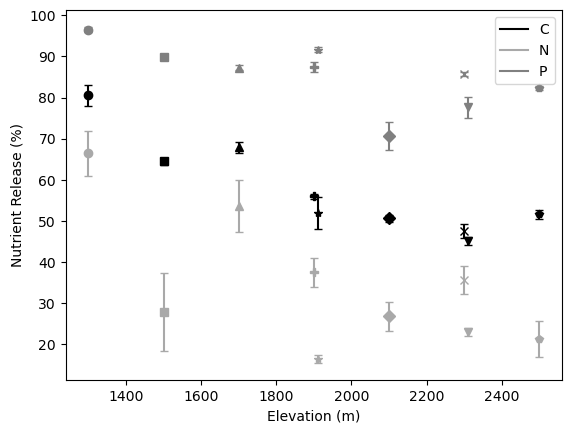

In [58]:
# FINAL NUTRIENT LEVELS as PERCENT RELEASED

fix,ax = plt.subplots()
leg_el = []
leg_name=[]

elev_prev = -1
for index, row in df.iterrows():
    if elev_prev == row['elevation']:
        row['elevation'] += 10
    ax.errorbar(row['elevation'], row['C Release'],yerr=row['C rel std. err'],capsize=3, color='black', marker=markers[index])
    ax.errorbar(row['elevation'], row['N Release'],yerr=row['N rel std. err'],capsize=3, color='darkgray', marker=markers[index])
    ax.errorbar(row['elevation'], row['P Release'],yerr=row['P rel std. err'],capsize=3, color='gray', marker=markers[index])
    elev_prev = row['elevation']
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Nutrient Release (%)')
leg_el.append(Line2D([0],[0],color='black'))
leg_el.append(Line2D([0],[0],color='darkgray'))
leg_el.append(Line2D([0],[0],color='gray'))
leg_name.append('C')
leg_name.append('N')
leg_name.append('P')
ax.legend(leg_el, leg_name)

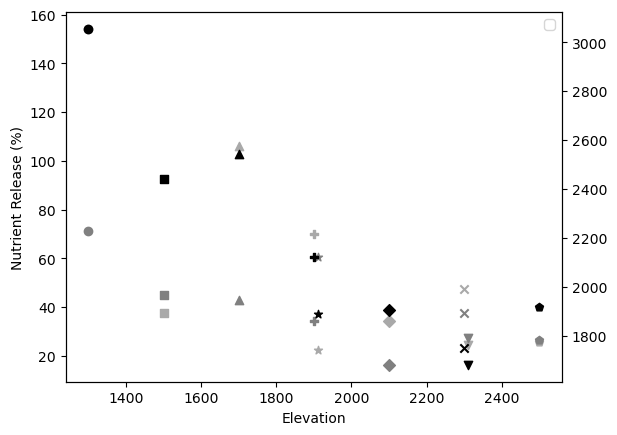

In [59]:
# NOT USED IN DELIVERABLE
# FINAL NUTRIENT LEVELS as INITIAL*RELEASE


fix,ax = plt.subplots()
ax2=ax.twinx()
leg_el = []
leg_name=[]

df['C_fin'] = df['C']*df['C Release']
df['N_fin'] = df['N']*df['N Release']
df['P_fin'] = df['P']*df['P Release']
elev_prev = -1
for index, row in df.iterrows():
    if elev_prev == row['elevation']:
        row['elevation'] += 10
    ax2.scatter(row['elevation'], row['C_fin'], color='black', marker=markers[index])
    ax.scatter(row['elevation'], row['N_fin'], color='darkgray', marker=markers[index])
    ax.scatter(row['elevation'], row['P_fin'],color='gray', marker=markers[index])
    elev_prev = row['elevation']
ax.set_xlabel('Elevation')
ax.set_ylabel('Nutrient Release (%)')
ax.legend(leg_el, leg_name)